In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from information.revealer import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
t = pd.Series(np.arange(10)[::-1], name='t', dtype=float)
s = pd.Series([1, 0, 1, 0, 1, 0, 0, 0, 0, 0], name='s')
u = pd.Series([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], name='u')
v = pd.Series([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], name='v')
w = pd.Series([0, 0, 0, 0, 0, 4, 0, 2, 0, 0], name='w') / 9
x = pd.Series([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], name='x')
features = pd.concat([s, u, v, w, x], axis=1)

In [3]:
rev = Revealer(t, features).match()

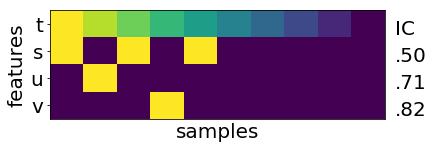

In [4]:
fig, ax = rev.plot_matches()

In [5]:
rev.compute_pvals(n_permutations=100)

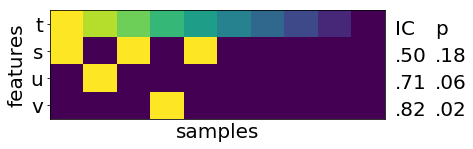

In [6]:
fig, ax = rev.plot_matches()

### Combining before (IC) vs. after (CIC)

In [7]:
x = np.random.normal(size=100)
y = np.random.normal(size=100)
z = np.random.normal(size=100)

In [8]:
ic_time = %timeit -o compute_ic(x, y)

10 loops, best of 3: 54.3 ms per loop


In [9]:
cic_time = %timeit -o compute_ic(x, y, z=z)

1 loop, best of 3: 1.68 s per loop


In [10]:
np.mean(cic_time.all_runs) / np.mean(ic_time.all_runs)

2.9670039595069961

So CIC takes about 3x as long as IC here.

In [11]:
cfirst_time = %timeit -o Revealer(t, features, combine_first=True, combine_mode='auto').match()

1 loop, best of 3: 542 ms per loop


In [12]:
clast_time = %timeit -o Revealer(t, features, combine_first=False, combine_mode='auto').match()

1 loop, best of 3: 3.69 s per loop


In [13]:
np.mean(clast_time.all_runs) / np.mean(cfirst_time.all_runs)

6.895912389671178

So combining before is ~7 times faster when applicable